In [3]:
from minigrid.wrappers import ImgObsWrapper
import gymnasium as gym
from minigrid.core.grid import Grid
import torch

pygame 2.5.2 (SDL 2.28.2, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
env = gym.make("MiniGrid-FourRooms-v0", render_mode="rgb_array")
env = ImgObsWrapper(env)

In [5]:
path = "/local/home/argesp/interface-minigrid/outputs/2024-02-25/00-56-11/media/episodes/train/best_episode_0_epoch_9.pt"
v = torch.load(path)

In [4]:
full_frame = v["observations"][:, 2]

In [6]:
frame = v["observations"][:, 1, :7, :7]

In [6]:
v["observations"].shape

torch.Size([1622, 3, 19, 19, 3])

In [7]:
a,_ = env.reset()

In [8]:
env.unwrapped.agent_view_size

7

In [7]:
def mask_output(obs):
    
    masked_logits = obs
    masked_logits[..., 0] %= 11
    masked_logits[..., 1] %= 6
    masked_logits[..., 2] %= 3

    return masked_logits

d, e = Grid.decode(mask_output(frame[10]).numpy())

KeyError: 9

In [11]:
frame[10][:, :,1]

tensor([[ 9,  4,  9, 10,  7,  9,  9],
        [ 6,  4,  8,  6,  7, 10,  7],
        [ 4,  6,  0,  1,  8,  4,  6],
        [ 3, 10,  0,  0,  7, 10,  7],
        [ 6,  2,  7,  5,  4,  4,  2],
        [ 6,  8,  8,  3,  6,  9,  3],
        [ 6,  1,  8,  2,  3,  0,  6]], dtype=torch.uint8)

In [40]:
full_frame[0].numpy().min()

0

In [14]:
        # Render the whole grid
img = d.render(
    16,
    agent_pos=(7 // 2, 7 - 1),
    agent_dir=3,
    # highlight_mask=False,
)

NameError: name 'd' is not defined

In [ ]:
CELL_PIXELS = 32

def get_obs_render(self, obs, tile_size=CELL_PIXELS//2, mode='pixmap'):
   """
   Render an agent observation for visualization
   """

   if self.obs_render == None:
      from gym_minigrid.rendering import Renderer
      self.obs_render = Renderer(
            self.agent_view_size * tile_size,
            self.agent_view_size * tile_size
      )

   r = self.obs_render

   r.beginFrame()

   grid = Grid.decode(obs)

   # Render the whole grid
   grid.render(r, tile_size)

   # Draw the agent
   ratio = tile_size / CELL_PIXELS
   r.push()
   r.scale(ratio, ratio)
   r.translate(
      CELL_PIXELS * (0.5 + self.agent_view_size // 2),
      CELL_PIXELS * (self.agent_view_size - 0.5)
   )
   r.rotate(3 * 90)
   r.setLineColor(255, 0, 0)
   r.setColor(255, 0, 0)
   r.drawPolygon([
      (-12, 10),
      ( 12,  0),
      (-12, -10)
   ])
   r.pop()

   r.endFrame()

   if mode == 'rgb_array':
      return r.getArray()
   elif mode == 'pixmap':
      return r.getPixmap()
   return r

In [12]:
import matplotlib.pyplot as plt

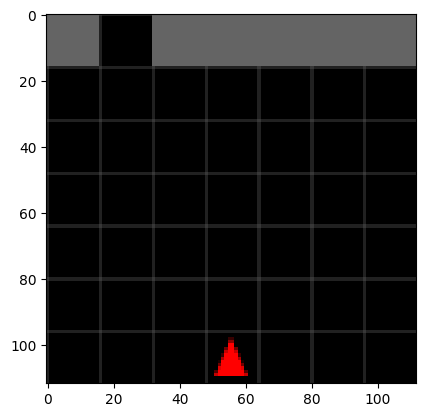

In [24]:
plt.imshow(img)

In [14]:
import numpy as np
from PIL import Image
from minigrid.core.constants import IDX_TO_COLOR, COLORS

# Define the RGB values for each object type, color, and state
# You can change these values as you like


# Define a sample minigrid array grid encoding
# You can use any encoding you want
grid = np.array([
    [[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]],
    [[1, 0, 0], [2, 0, 0], [3, 1, 0], [2, 0, 0], [1, 0, 0]],
    [[1, 0, 0], [2, 0, 0], [4, 2, 1], [2, 0, 0], [1, 0, 0]],
    [[1, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], [1, 0, 0]],
    [[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]],
])

grid = full_frame[10].numpy()

# Get the height and width of the grid
height, width, _ = grid.shape

# Create a new image object with the same size as the grid
img = Image.new('RGB', (width, height))

# Loop over each grid cell and fill the corresponding pixel with the color
for i in range(height):
    for j in range(width):
        # Get the object type, color, and state codes
        obj_type, obj_color, obj_state = grid[i, j]
        # Get the RGB values for each code
        # type_rgb = COLORS[obj_type]
        color_rgb = COLORS[IDX_TO_COLOR[obj_color]]

        # state_rgb = COLORS[obj_state]
        # Combine the RGB values by averaging them
        # Fill the pixel with the color
        img.putpixel((j, i), color_rgb)

# Show the image
img.show()
plt.imshow(img)


KeyError: 5

In [16]:
COLORS[0]

(0, 0, 0)

In [12]:
img.shape

NameError: name 'img' is not defined